# Vezba 1 - Osnovna klasifikacija

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
#df.drop(['area_code]', axis = 1)

In [4]:
X = df.drop('churn', axis=1)
y = df['churn']

#X = df.iloc[:, :-1] #Uzimamo sve kolone osim poslednje
#y = df.iloc[:, -1] #Uzimamo poslednju kolonu

In [5]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [6]:
X.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [7]:
X["area_code"]       

0       area_code_415
1       area_code_415
2       area_code_408
3       area_code_415
4       area_code_510
            ...      
4245    area_code_415
4246    area_code_408
4247    area_code_408
4248    area_code_408
4249    area_code_415
Name: area_code, Length: 4250, dtype: object

In [8]:
X = df.select_dtypes(include=['int64', 'float64'])

In [9]:
#X.drop(['area_code'], axis = 1)

In [10]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

In [12]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [13]:
model.predict(X)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [14]:
pd.DataFrame({'stvarno':y,'predvidjeno':model.predict(X)}).head(15)

,stvarno,predvidjeno
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,yes,yes
9,no,no


In [15]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X)
accuracy_score(y, predictions)
f'Naš model je {round(accuracy_score(y, model.predict(X)) * 100, 2)}% tačan'

'Naš model je 91.22% tačan'

### Other algorithms

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.8870588235294118

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.908

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.8611764705882353

### Complex model and Decision boundaries

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X, y)
accuracy_score(y, model.predict(X))

0.9336470588235294

# Vezba 2 - Evaluation

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [21]:
model = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8596078431372549

In [22]:
model = GaussianNB().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.883921568627451

In [23]:
model = KNeighborsClassifier().fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8776470588235294

In [24]:
model = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.847843137254902

In [25]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.9137254901960784

ponavljan vise puta... varijabilnost rezultata!

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8611764705882353

### X-Val  (prvo slajd)

In [27]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(max_depth=20)
results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(results)

[0.86117647 0.85647059 0.87529412 0.88705882 0.87764706 0.88
 0.88       0.87294118 0.85647059 0.88      ]


In [28]:
print(results.mean(),results.std())

0.8727058823529411 0.010280495188213409


### Kriva učenja (prvo slajd)

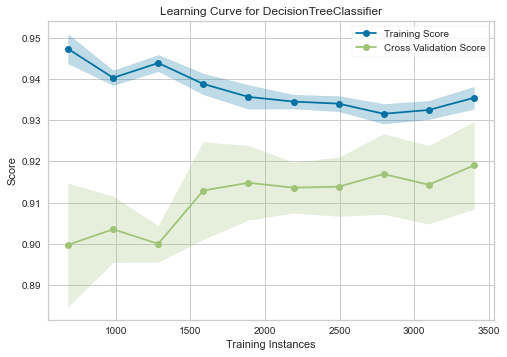

In [29]:
#!pip install yellowbrick
from yellowbrick.model_selection import LearningCurve
model = DecisionTreeClassifier(max_depth=5)
steps = np.linspace(0.2, 1.0, 10)
visualizer = LearningCurve(model, cv=5, scoring='accuracy', train_sizes=steps, n_jobs=4)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show();

# Vezba 3 - Metrike evaluacije

## Baseline model

In [30]:
y.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [31]:
predictions = np.repeat(0, len(y))

In [32]:
y = y.astype('bool')

In [33]:
y.dtype

dtype('bool')

In [34]:
predictions.dtype

dtype('int32')

In [35]:
accuracy_score(y, predictions)

0.0

### Metrike

In [36]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X,y)
confusion_matrix(y_true=y, y_pred=model.predict(X))

array([[4250]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_hat = model.predict(X)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = f1_score(y, y_hat)
f'Mere performansi modela su {np.round(prec * 100, 2)}% preciznosti, {np.round(rec * 100, 2)}% odziva i {np.round(f1 * 100, 2)}% F mere'

'Mere performansi modela su 100.0% preciznosti, 100.0% odziva i 100.0% F mere'

In [38]:
cross_val_score(model, X, y, cv=10, scoring='precision').mean()

1.0

### Cene gresaka

In [39]:
confusion_matrix(y, model.predict(X))

array([[4250]], dtype=int64)

In [40]:
costs = np.array([[0, 5], [1, 0]])
costs

array([[0, 5],
       [1, 0]])

In [41]:
confusion_matrix(y, model.predict(X)) * costs

array([[    0, 21250],
       [ 4250,     0]], dtype=int64)

In [42]:
(confusion_matrix(y, model.predict(X)) * costs).sum().sum()

25500

In [43]:
def matrica_troskova(y_true, y_pred, costs):
    conf_max = confusion_matrix(y_true, y_pred)
    return (conf_max * costs).sum()/conf_max.sum()

In [44]:
matrica_troskova(y,model.predict(X), costs)

6.0

In [45]:
from sklearn.metrics import make_scorer
costs_scorer = make_scorer(matrica_troskova, costs=costs, greater_is_better=False)

In [46]:
#cross_val_score(LogisticRegression(), X, y, cv=10, scoring=costs_scorer)

# Vezba 4 - Granice odluke i AUC

In [47]:
#model = LogisticRegression().fit(X, y)
#robas = model.predict_proba(X)
#probas

In [49]:
#res = pd.DataFrame({'stvarno': y, 'predvidjeno': probas[:, 1]})
#res.head()

In [50]:
#confusion_matrix(y, model.predict(X))

In [51]:
#model.predict_proba(X)[:, 1]

In [52]:
#predictions = model.predict_proba(X)[:, 1] >= 0.2
#confusion_matrix(y, predictions)

In [53]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve
#model = LogisticRegression()
#model.fit(X, y)
#fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
#plt.plot(fpr, tpr)

In [54]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y, model.predict_proba(X)[:, 1])

In [55]:
#model = LogisticRegression()
#results = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
#print(results.mean())
#print(results.std())